In [246]:
# -*- coding: utf-8 -*-
# Initial setup

%precision 3
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


path = 'machine-learning-ex1/ex1/'

## 1. Linear Regression with One Variable

### 1.1 Examine Data

In [257]:
# Prepare data
data = ([map(float, line.strip().split(',')) 
         for line in open(path + 'ex1data1.txt')])
data = np.array(data)
m = len(data)
X, y = data[:, 0].reshape([m, 1]), data[:, 1].reshape([m, 1])

# add x0=1
X = np.hstack([np.ones([m, 1]), X])

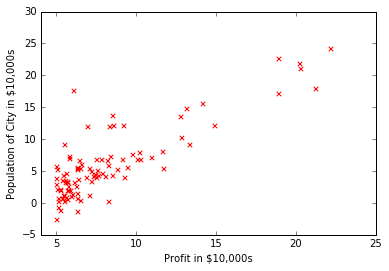

In [258]:
# Plot data
plt.scatter(x=X[:, 1], y=y, c='red', marker='x')
plt.xlim([np.min(X[:, 1])-1, 25])
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in $10,000s')
plt.show()

### 1.2 Gradient Descent

In [259]:
# Initialize settings
num_iters = 1500
theta = np.zeros([1, 2])
alpha = 0.01

# Define cost function
def compute_cost(X, y, theta):
    m = len(X)
    predictions = X.dot(theta.T) - y
    sqr_errs = predictions ** 2
    return sum(sqr_errs) / (2 * m)

j = compute_cost(X, y, theta)
j

array([ 32.07273388])

In [260]:
# Define gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(X)
    theta = theta
    theta_history = np.zeros([num_iters, X.shape[-1]])
    cost_history = np.zeros([num_iters, 1])
    for i in range(num_iters):
        predictions = X.dot(theta.T) - y
        theta = theta - ((alpha / m) * sum(predictions * X))
        '''
        # Caculating partial derivatives for linear regression with one variable
        theta[0, 0] = theta[0, 0] - ((alpha / m) * sum(predictions))
        theta[0, 1] = theta[0, 1] - ((alpha / m) * sum(predictions * X[:, 1].reshape([m, 1])))
        '''
        theta_history[i] = theta
        cost_history[i] = compute_cost(X, y, theta)
    return theta_history, cost_history 
        
theta_history, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

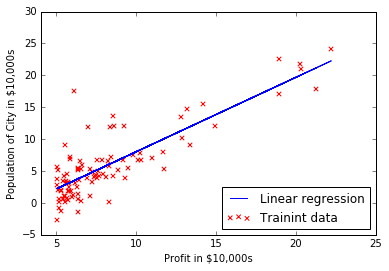

In [261]:
# Plot data
plt.scatter(x=X[:, 1], y=y, c='red', marker='x')
plt.xlim([np.min(X[:, 1])-1, 25])
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in $10,000s')

# Add linear regression fit
plt.plot(X[:, 1], X.dot(theta_history[-1].T))
plt.legend(['Linear regression', 'Trainint data'], loc='lower right')
plt.show()

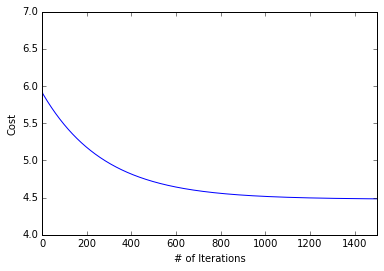

In [262]:
# Visualize the optimization of cost function J: line chart
plt.plot(cost_history)
plt.xlim([0, num_iters])
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.show()

In [263]:
# Visualize the optimization of cost function J: surface plot

In [264]:
# Visualize the optimization of cost function J: contour plot

## 2. Linear Regression with Multiple Variables

In [366]:
# Prepare data
housing = ([map(float, line.strip().split(',')) 
         for line in open(path + 'ex1data2.txt')])
housing = np.array(housing)
m = len(housing)
X, y = housing[:, [0, 1]].reshape([m, 2]), housing[:, 2].reshape([m, 1])

In [367]:
# Define feature normalization
def feature_normalize(X):
    mu, sigma = np.mean(X, axis=0), np.std(X, axis=0)
    return (X - mu) / sigma

norm_X = feature_normalize(X)

# add x0=1
norm_X = np.hstack([np.ones([m, 1]), norm_X])

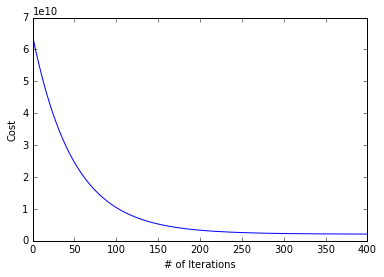

In [368]:
# Initialize settings
num_iters = 400
theta = np.zeros([1, norm_X.shape[-1]])
alpha = 0.01

thetas, costs = gradient_descent(norm_X, y, theta, alpha, num_iters)

# Visualize the optimization of cost function J: line chart
plt.plot(costs)
plt.xlim([0, num_iters])
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.show()

## 3. Normal Equations

In [363]:
print thetas[-1] # Batch gradient descent
X = np.hstack([np.ones([m, 1]), X])
params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # Normal equation
print params[:, 0] 

[ 334302.06399328   99411.44947359    3267.01285407]
[ 89597.9095428     139.21067402  -8738.01911233]


In [369]:
# Prepare a test case of a 1650 sq-ft, 3 br house
test = np.array([[1, 1650, 3]])

# Predict with params from batch gradient descent
print test.dot(thetas[-1].reshape([1, 3]).T)

# Predict with params from normal equation
print test.dot(parameters)

[[  1.64372995e+08]]
[[ 293081.46433489]]
